In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This worksheet contains code that generates a variety of LSTM test cases. The output files are suitable for use with `clstmseq`.

In [8]:
from pylab import *
import h5py
from scipy.ndimage import filters

default_ninput = 1
default_n = 200

In [17]:
def h5put(h5, name, a, dtype='float32'):
    ds = h5.create_dataset(name, a.shape, compression="gzip", dtype=dtype)
    ds[:] = a[:]

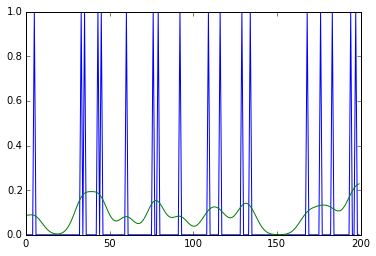

In [18]:
inputs = 1.0 * (rand(20000,200,1)>0.9)
outputs = empty_like(inputs)
for i in range(len(inputs)):
    outputs[i] = filters.gaussian_filter(inputs[i],(5.0,0))
plot(inputs[17,:,0])
plot(outputs[17,:,0])

In [19]:
!rm -f convtest-gauss5.h5
h5 = h5py.File("convtest-gauss5.h5","w")
h5put(h5, "inputs", inputs)
h5put(h5, "outputs", outputs)
h5.close()

In [24]:
!lrate=1e-3 report_every=100 ntrain=20000 test_every=1000 ntest=100 ../clstmconv convtest-gauss5.h5

got 20000 training samples
ninput 1 noutput 1
0 0.00830401
100 0.00626053
200 0.00740116
300 0.00693815
400 0.00715059
500 0.00280985
600 0.00224592
700 0.00903127
800 0.00324941
900 0.0019012
TESTERR 0.00334809 0.210058 N 100 at 1000
1100 0.00350397
1200 0.00260891
1300 0.00220034
1400 0.00196473
1500 0.00190059
1600 0.0012871
1700 0.000896037
1800 0.00142246
1900 0.000344266
TESTERR 0.000378672 0.0237577 N 100 at 2000
2100 0.000468153
2200 0.000281716
2300 0.000153439
2400 0.000125248
2500 0.00016737
2600 0.000201936
2700 0.000284466
2800 6.77844e-05
2900 0.000134163
TESTERR 0.000114006 0.0071527 N 100 at 3000
3100 0.00010601
3200 5.34484e-05
3300 5.94225e-05
3400 0.000293706
3500 7.28948e-05
3600 6.8172e-05
3700 0.000118219
3800 7.63084e-05
3900 6.08104e-05
TESTERR 8.42978e-05 0.0052888 N 100 at 4000
4100 9.17353e-05
4200 6.0381e-05
4300 5.3469e-05
4400 6.88134e-05
4500 0.000103469
4600 9.89765e-05
4700 0.000328588
4800 5.59913e-05
4900 6.65085e-05
TESTERR 0.000103569 0.00649789 N 1